### Reminder:  Clear output before saving for commit.
otherwise merging will suck.

Molly and Alyssa will mostly work in this file

Main project requirements:
  * few plots per question 2 per question 6-8 plots in total
  * heading for each q and summary of findings under q
  * at least 1 linear regression on at least Q4.
  


In [1]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
import seaborn as sns 

In [2]:
file_path = 'Data/database.csv'
df = pd.read_csv(file_path, low_memory=False)  #low memory imput to avoid warning message
# df.info()
# column notes:
# Species Quantity values: '1', '2-10', nan, '11-100', 'Over 100' 

In [21]:
subset_df = df[["Incident Year","Incident Month","Airport","Airport ID", "State","Aircraft","Aircraft Type", "Flight Phase", "Species Name","Species ID","Species Quantity"]]
subset_df.to_csv("Data/data_subset.csv")

0                        GULL
1               HOUSE SPARROW
2                    BARN OWL
3         UNKNOWN MEDIUM BIRD
4                       FINCH
                 ...         
174099     UNKNOWN SMALL BIRD
174100     UNKNOWN SMALL BIRD
174101         TURKEY VULTURE
174102          HERMIT THRUSH
174103                SWALLOW
Name: Species Name, Length: 174104, dtype: object

# Which bird is the most dangerous 1990-2014?

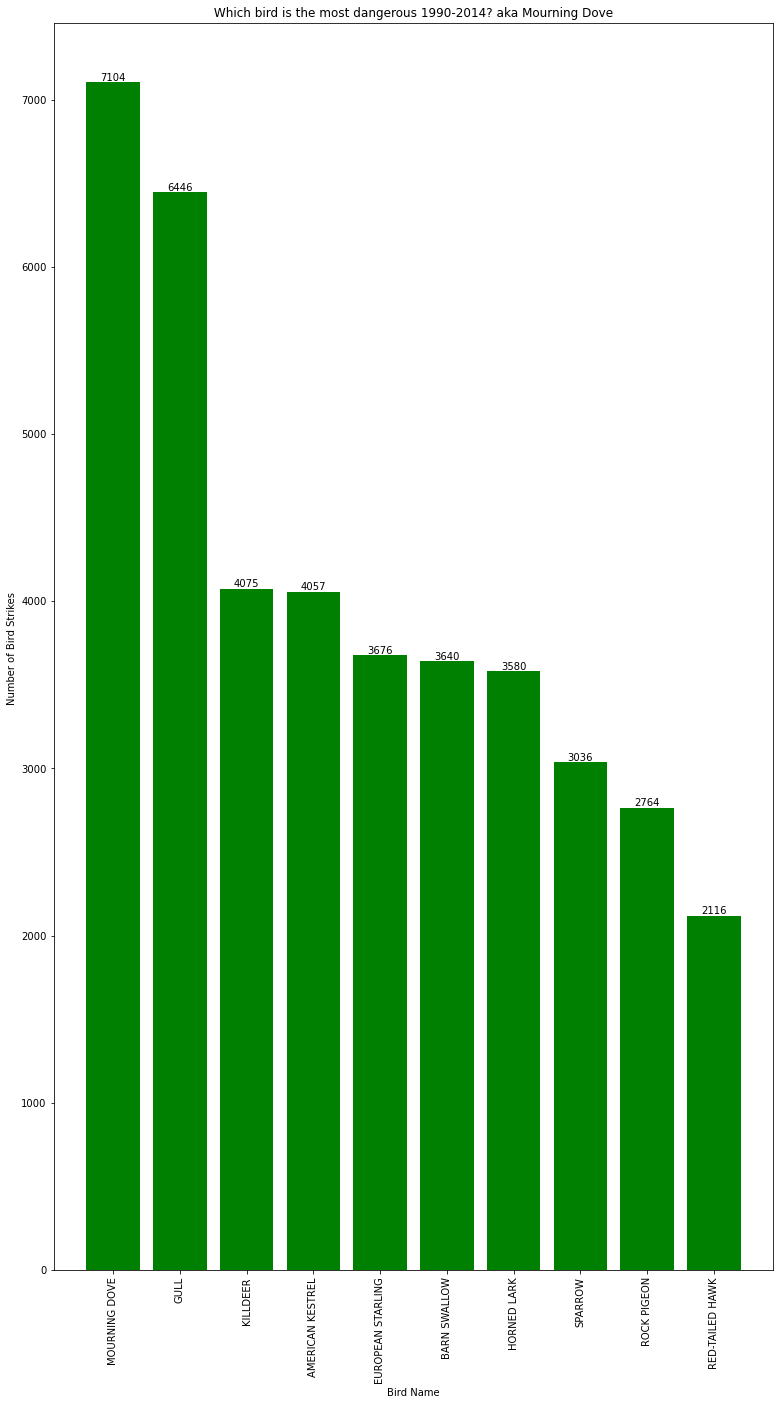

In [4]:
#removing "unknown" bird species, removing partial year data for 2015
birdType_df = subset_df[["Species Name","Species ID","Species Quantity"]].loc[(subset_df["Species Name"]!= "UNKNOWN MEDIUM BIRD") & (subset_df["Species Name"]!= "UNKNOWN SMALL BIRD") 
                                                                              & (subset_df["Species Name"]!= "UNKNOWN LARGE BIRD") & (subset_df["Species Name"]!= "UNKNOWN BIRD")
                                                                              & (subset_df["Incident Year"]!= 2015)]


# todo add labels, pretty up.  add thoughts on results
birdCounts = birdType_df["Species Name"].value_counts()

y_axis = birdCounts[:10]  
x_axis = birdCounts.index[:10]

# plt.figure(figsize=(10,5))
plt.bar(x_axis, y_axis, color = "green")
plt.tight_layout()  
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,birdCounts.index[:10], rotation="vertical")

plt.xlabel('Bird Name') # Label the x axis 
plt.ylabel("Number of Bird Strikes ")  # Label the y axis
plt.title(" Which bird is the most dangerous 1990-2014? aka Mourning Dove ")

for i in range(len(y_axis)):
    plt.annotate(str(y_axis[i]), xy=(x_axis[i],y_axis[i]), ha='center', va='bottom')


figure = plt.gcf()

figure.set_size_inches(12, 20)

plt.savefig("Images/DangerousMourningDove.png", dpi=500) # TODO The legend and axis names are put in the saved image.

plt.show() 
 

# TODO Add Data Labels and name all axis - DONE 
# Write a observation summary for the graph. 
# based on animal species identified, Mourning doves and Gull are responsible for most stikes. 

### Which month of the year has most animal strikes?



In [5]:
# subset_df

In [6]:
numberofthings = df['Species Name'].unique()
len(numberofthings)

716

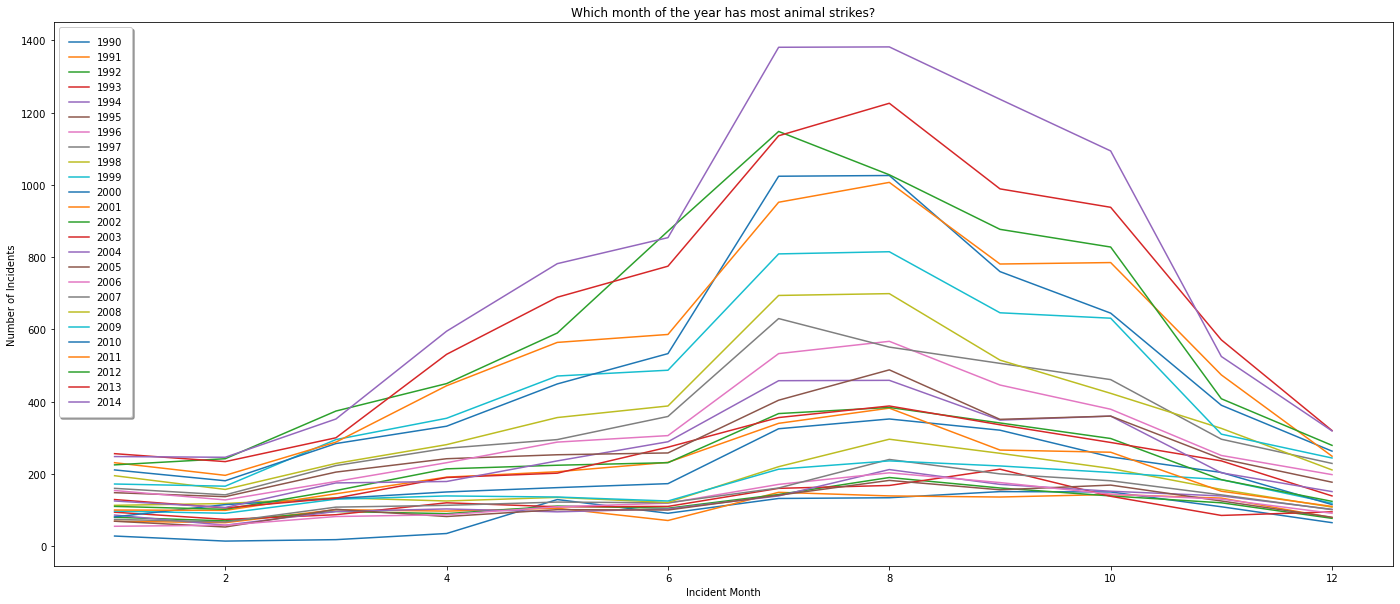

In [7]:
#### Which month of the year has most animal strikes?  - Jag 

#removing "unknown" bird species, removing partial year data for 2015
monthType_df = subset_df[["Incident Year","Incident Month","Species Quantity","Aircraft"]].loc[(subset_df["Species Name"]!= "UNKNOWN MEDIUM BIRD") & (subset_df["Species Name"]!= "UNKNOWN SMALL BIRD") 
                                                                              & (subset_df["Species Name"]!= "UNKNOWN LARGE BIRD") & (subset_df["Species Name"]!= "UNKNOWN BIRD")
                                                                              & (subset_df["Incident Year"]!= 2015)]


# todo add labels, pretty up.  add thoughts on results

fig, ax = plt.subplots(figsize=(24,10))
ax.set_xlabel('Months (1-12)')
ax.set_ylabel('Number of Incidents')
monthType_df.groupby(['Incident Month','Incident Year']).count()['Aircraft'].unstack().plot(ax=ax,title= 'Which month of the year has most animal strikes?' )         
plt.savefig("Images/AugustReallySucks.png", dpi=500) # TODO The legend and axis names are put in the saved image.
ax.legend(loc='upper left', frameon=True, fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()


# Analyis 
# Number of srtrikes are increasing YOY
# August is consistently the month with most strikes with a visible increase from  2013 and 2014 
# Summer months(July -Sep)  have more strikes than winter months (Nov - Feb)

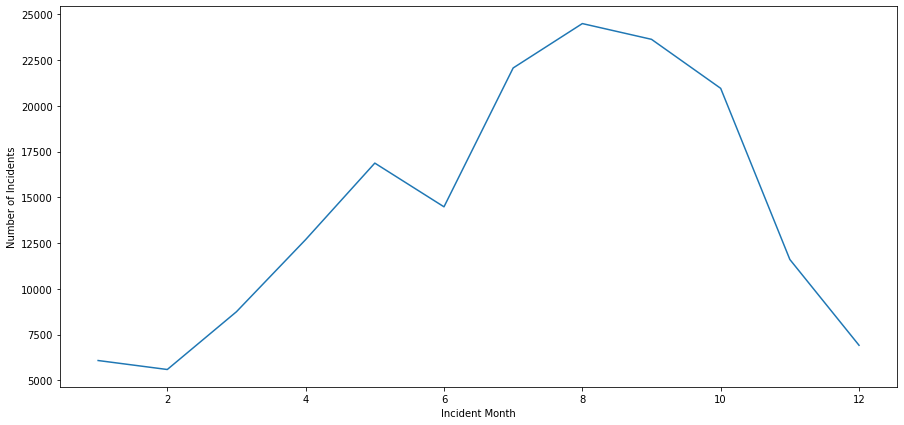

In [8]:
#jag
fig, ax = plt.subplots(figsize=(15,7))
ax.set_xlabel('Months (1-12)')
ax.set_ylabel('Number of Incidents')
df.groupby(['Incident Month']).count()['Aircraft'].plot(ax=ax)
plt.show()
#Add a grid to make it obvious Aug is the most dangerous month 

In [9]:
#jag

In [10]:
#jag <DO NOT CODE ABOVE THIS LINE> 

In [11]:
# Which airport or geographic area is more likely to crash? - Molly (try a stacked graph) 




In [12]:
state_df = subset_df.groupby(['State'], as_index='True')
state_grouping_count = pd.DataFrame(state_df['Incident Year'].count())
state_grouping_count

,Incident Year
State,
AB,47
AK,1010
AL,1414
AR,837
AZ,2455
...,...
VT,266
WA,2507
WI,1810


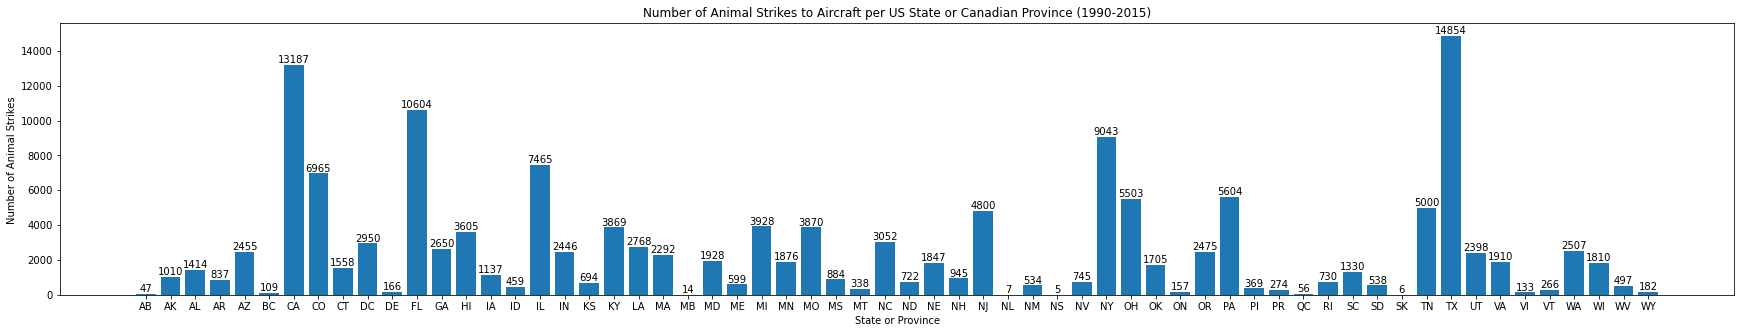

In [13]:
x_axis = state_grouping_count.index
y_axis = state_grouping_count['Incident Year']

plt.figure(figsize=(30,5))
plt.bar(x_axis, y_axis)
plt.xlabel('State or Province') # Label the x axis 
plt.ylabel("Number of Animal Strikes ")  # Label the y axis
plt.title("Number of Animal Strikes to Aircraft per US State or Canadian Province (1990-2015)")

for i in range(len(y_axis)):
    plt.annotate(str(y_axis[i]), xy=(x_axis[i],y_axis[i]), ha='center', va='bottom')
    
plt.savefig("Images/StrikesPerStateNA.png", dpi=500) # TODO The legend and axis names are put in the saved image.


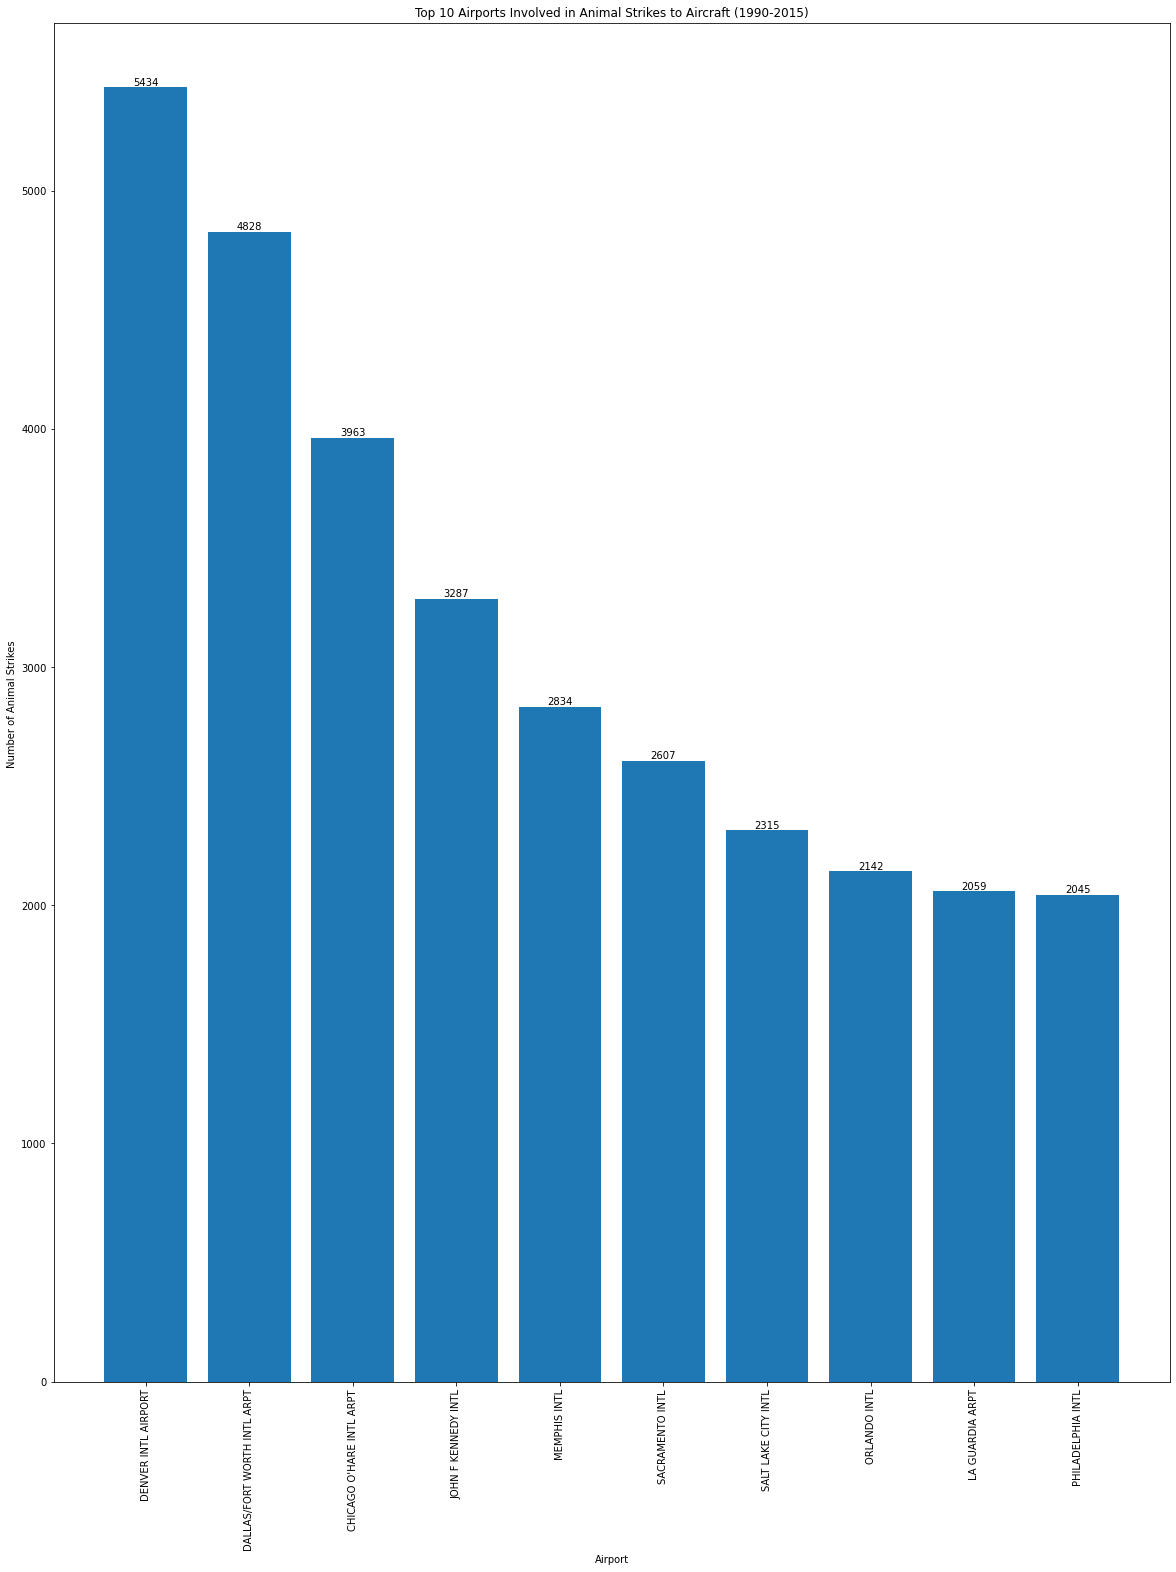

In [14]:
airport_df = subset_df.loc[subset_df['Airport'] != 'UNKNOWN', :]
airport_grouping_count = airport_df.groupby(['Airport']).count().sort_values('Incident Year', ascending = False)
airport_grouping_count.head()

x_axis = airport_grouping_count.index[:10]
y_axis = airport_grouping_count['Incident Year'][:10]

plt.figure(figsize=(20,25))
plt.bar(x_axis, y_axis)
plt.xlabel('Airport') # Label the x axis 
plt.ylabel("Number of Animal Strikes ")  # Label the y axis
plt.title("Top 10 Airports Involved in Animal Strikes to Aircraft (1990-2015)")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,x_axis, rotation="vertical")

for i in range(len(y_axis)):
    plt.annotate(str(y_axis[i]), xy=(x_axis[i],y_axis[i]), ha='center', va='bottom')
    
plt.savefig("Images/Top10AirportsNA.png", dpi=1000) # TODO The legend and axis names are put in the saved image.


In [15]:
# Stacked bar graph instructions
# https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

In [16]:
# Molly ^^^